In [1]:
from google.colab import files
uploaded= files.upload()

Saving iris.csv to iris.csv


In [8]:
# -----------------------------------
# 📌 1) Install libraries (one-time)
# pip install xgboost pandas scikit-learn
# -----------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# -----------------------------------
# 📌 2) Load Kaggle Iris dataset
# Download from: https://www.kaggle.com/datasets/uciml/iris
# Example file: iris.csv
# -----------------------------------

df = pd.read_csv("iris.csv")
print(df.head())

# Check column names
print("\nColumns:", df.columns)

# -----------------------------------
# 📌 3) Define features & target
# 'species' is the target column in Iris CSV
# -----------------------------------

X = df.drop("species", axis=1)
y = df["species"]

# Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# -----------------------------------
# 📌 4) Split data into train/test
# -----------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# -----------------------------------
# 📌 5) Train XGBoost classifier
# -----------------------------------

model = XGBClassifier(
    objective='multi:softmax',  # outputs labels directly
    num_class=len(le.classes_), # 3 classes for Iris
    eval_metric='mlogloss',
    use_label_encoder=False,
    max_depth=4,
    learning_rate=0.3,
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------------------
# 📌 6) Make predictions
# -----------------------------------

# Predict class labels
y_pred = model.predict(X_test)

# Predict class probabilities
y_prob = model.predict_proba(X_test)

# -----------------------------------
# 📌 7) Evaluate & show sample predictions
# -----------------------------------

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n",
      classification_report(y_test, y_pred, target_names=le.classes_))

print("\n Predicted class labels:", y_pred[:5])
print(" Actual class labels   :", y_test[:5])

print("\n Predicted probabilities for first 5 samples:\n", y_prob[:5])


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

 Accuracy: 0.9333333333333333

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


 Predicted class labels: [0 2 1 1 0]
 Actual class labels

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:25:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


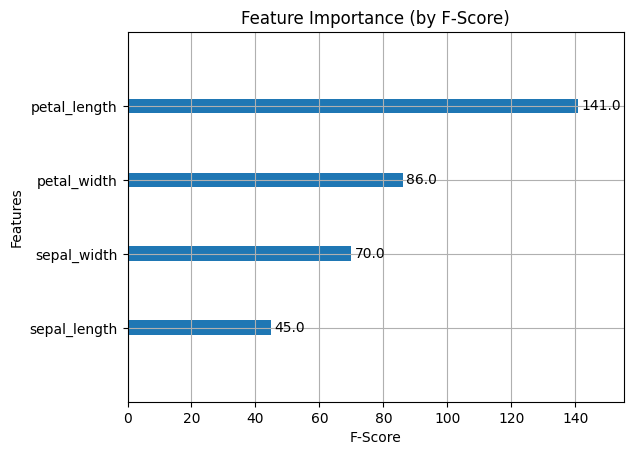

In [9]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# ✅ 1️⃣ Use XGBoost’s built-in plot
plot_importance(model, importance_type='weight', xlabel='F-Score')
plt.title("Feature Importance (by F-Score)")
plt.show()